TTTT Analysis
======
This Notebook is simply a playground to examine the resulting histograms from the main TTTT analysis executable.

In [50]:
import ROOT
from IPython.display import display, display_markdown
%load_ext autoreload
%autoreload 2
import random
from utils import HistCollection as HC
from utils import clear, show_event, show_value, normalize_columns, CANVAS, PDG

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we need to load the pre-processed datafiles. These will generally contain a set of histograms of various quantities calculated from data in the input MiniTrees. However, they can also contain things besides histograms. For example, C++ STL containers can be serialized to the ROOT file to save things such as counters or even "raw" event information.

In [51]:
hists_TTZ = HC("TTZ", "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
hists_TTW = HC("TTW", "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root")
hists_TTTT = HC("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root")

Running analysis for sample:  TTZ
Writing log data to ../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTW
Writing log data to ../data/TTWToLNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTTT
Writing log data to ../data/TTTT_ext_treeProducerSusyMultilepton_tree_result.log


In [52]:
clear()
HC.hist_array_single('Jet_energy_vs_Jet_eta')
CANVAS.Draw()

In [53]:
clear()
HC.hist_array_single('dijet_inv_mass')
CANVAS.Draw()

In [54]:
clear()
HC.hist_array_single('rec_top_mass')
CANVAS.Draw()

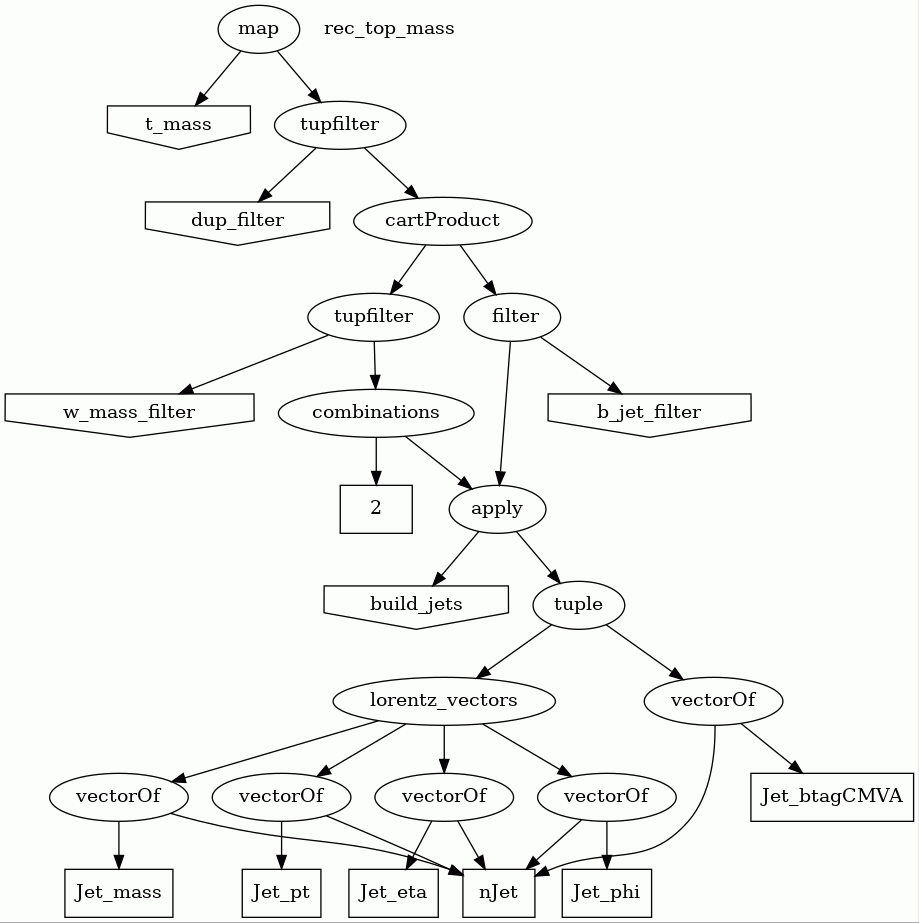

In [66]:
display(show_value(hists_TTTT.rec_top_mass))

In [55]:
clear()
HC.hist_array_single('dijet_inv_mass_ssdilepton')
CANVAS.Draw()

In [56]:
clear()
HC.hist_array_single('dijet_inv_mass_osdilepton')
CANVAS.Draw()

In [57]:
clear()
HC.hist_array_single('dijet_inv_mass_trilepton')
CANVAS.Draw()

In [58]:
CANVAS.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                    normalize_to=0,
                    enable_fill=True,
                    shape=(3,1),
                   )
CANVAS.Draw()

In [59]:
CANVAS.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                    normalize_to=0,
                    enable_fill=True,
                    shape=(3,1),
                    draw_option='nostack',
                   )
CANVAS.Draw()

In [60]:
hists_TTTT.draw()

In [61]:
hists_TTTT.nLepvsnJet_norm = normalize_columns(hists_TTTT.nLepvsnJet)
hists_TTZ.nLepvsnJet_norm = normalize_columns(hists_TTZ.nLepvsnJet)
hists_TTW.nLepvsnJet_norm = normalize_columns(hists_TTW.nLepvsnJet)
clear()
hists_TTTT.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

In [62]:
event_number = int(random.uniform(0,100))
TTZ_event = show_event(hists_TTZ, event_number)
TTW_event = show_event(hists_TTW, event_number)
TTTT_event = show_event(hists_TTTT, event_number)

We can use the `show_event` function to look at the Generator-Level particles for the event. They are color-coded based on their pt relative to the maximum pt of a particles in the event. Darker is lower, greener/lighter is higher. The following are the particle trees for event #{{event_number}} in each dataset.
  - TTZ Generator-Level Particles
{{TTZ_event}}
-----------------------------------------
  - TTW Generator-Level Particles
{{TTW_event}}
-----------------------------------------
  - TTTT Generator-Level Particles
{{TTTT_event}}

In [63]:
HC.stack_hist("lepton_count", title="Lepton Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("lepton_count_stack") at 0x21c05b20>

In [64]:
HC.stack_hist("b_jet_count", title="B-Jet Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("b_jet_count_stack") at 0x179f8de0>

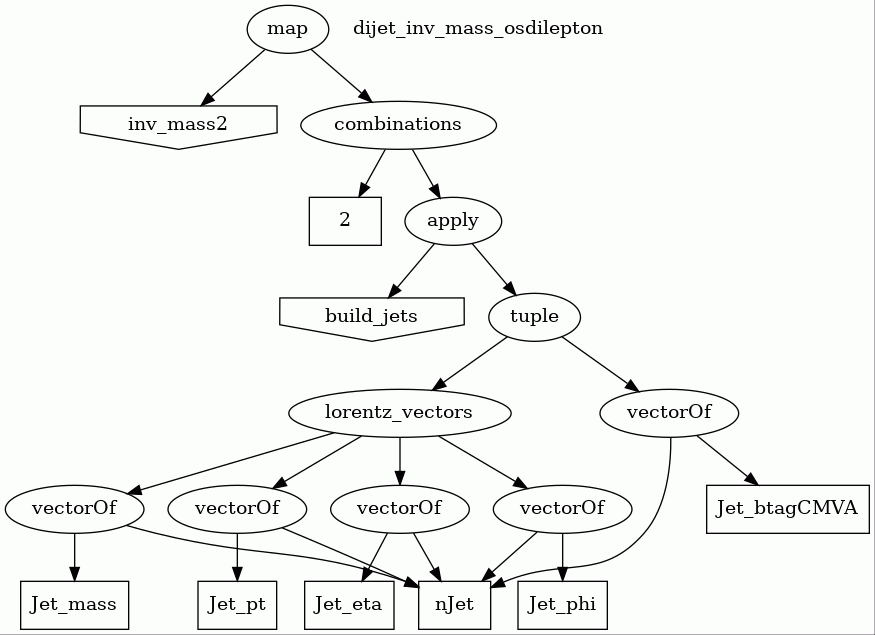

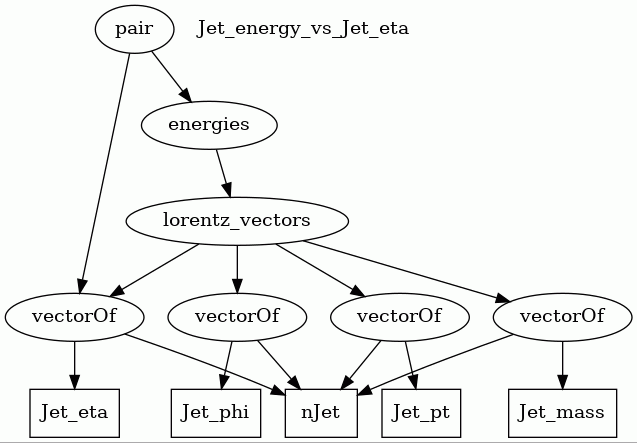

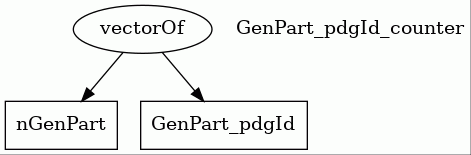

In [65]:
display(show_value(hists_TTTT.dijet_inv_mass_osdilepton))
display(show_value(hists_TTTT.Jet_energy_vs_Jet_eta))
display(show_value("GenPart_pdgId_counter"))